# Permutation test
The idea here is to shuffle the labels so we remove possible associations between features and targets. Then we use the classifier of choice, and calculate its performance over the shuffled data using the cross-validation method of choice. We repeat it, let's say, 1000 times. The number of times that we get a better score out of shuffled data compared to the original untouched data is an estimate of p-value. We check it over two different classifiers, one very weak (random) and one very strong. In summary, we showed that for `sklearn.datasets.load_iris` data, and using `sklearn.model_selection.permutation_test_score`, we can show that `sklearn.dummy.DummyClassifier` cannot find any significant statistical association between input features and iris types, while `sklearn.ensemble.HistGradientBoostingClassifier` discovers that.

Long ago, I used this method in this publication: [https://www.nature.com/articles/srep25103](https://www.nature.com/articles/srep25103), to estimate p-values and confidence intervals.

The texts were edited using: [MEditor](https://chat.openai.com/g/g-X7jMBq2II-meditor) a Minimal Editor that fixes only embarrassing mistakes.

In [1]:
# Load the libraries.
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, permutation_test_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

## Dummy Classifier

I use `sklearn.dummy.DummyClassifier` with the `strategy="stratified"`. At prediction time, it will output classes randomly, so by just looking at the labels, you cannot tell it is a dummy classifier.

In [2]:
# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Use StratifiedKFold to make sure all lables are present. 
cv = StratifiedKFold(2, shuffle=True)

# The DummyClassifier, I use "stratified" strategy so it spits out all the classes when predict is called.
dummy_clf = DummyClassifier(strategy = "stratified")

# Compute the permutation test score
score_dummy, permutation_scores_dummy, pvalue_dummy = permutation_test_score(dummy_clf, X, y, 
                                                                             scoring="accuracy", 
                                                                             cv=cv, 
                                                                             n_permutations=1000)

# Display results for DummyClassifier
print(f"DummyClassifier score: {score_dummy:.4f}, p-value: {pvalue_dummy:.4f}")

DummyClassifier score: 0.3200, p-value: 0.6274


The p-value is way larger than the common sense p-value of 0.05. This is not a good classifier and could not find the relation between features and classes. The histogram shows that it is a useless classifier, as its score and the score of permutations are overlapping.

Text(0.5, 1.0, 'Histogram of accuracies of permutations in Dummy classifier')

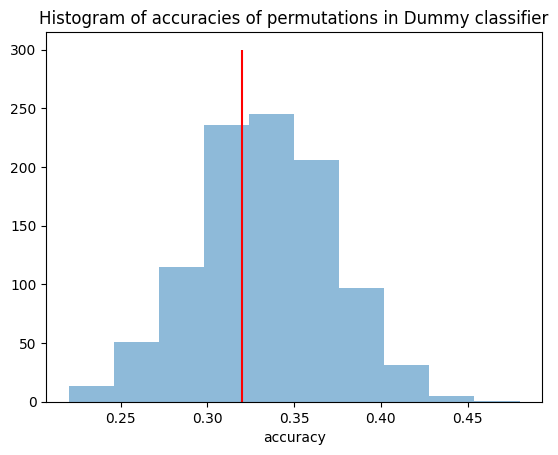

In [3]:
# Plot the histogram of pemutation scores (blue) and show dummy classifier score (red)
plt.hist(permutation_scores_dummy, alpha=0.5)
plt.vlines(score_dummy, 0, 300, 'r')
plt.xlabel('accuracy')
plt.title('Histogram of accuracies of permutations in Dummy classifier')

## HistGradientBoostingClassifier
This time we use `sklearn.ensemble.HistGradientBoostingClassifier`, which is much stronger at finding relations between features and targetsxlabelet's check it out in action.

In [4]:
# Initialize the HistGradientBoostingClassifier
hgbc_clf = HistGradientBoostingClassifier()

# Compute the permutation test score
score_hgbc, permutation_scores_hgbc, pvalue_hgbc = permutation_test_score(hgbc_clf, X, y, 
                                                                          scoring="accuracy", 
                                                                          cv=cv, 
                                                                          n_permutations=1000, 
                                                                          n_jobs=-1)

# Display results for HistGradientBoostingClassifier
print(f"HistGradientBoostingClassifier score: {score_hgbc:.4f}, p-value: {pvalue_hgbc:.4f}")

HistGradientBoostingClassifier score: 0.9267, p-value: 0.0010


The score is quite high compared to the last time and is close to the possible maximum of 1 for the accuracy score. The p-value is also 5 times less than the threshold of 0.05. Now let's see the histogram of permutation scores and compare it to the original score.

Text(0.5, 1.0, 'Histogram of accuracies of permutations in HGBC')

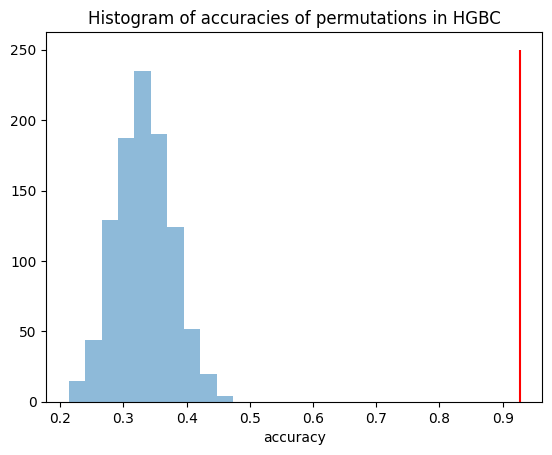

In [6]:
# Plot the histogram of pemutation scores (blue) and show hgbc classifier score (red)
plt.hist(permutation_scores_hgbc, alpha=0.5)
plt.vlines(score_hgbc, 0, 250, 'r')
plt.xlabel('accuracy')
plt.title('Histogram of accuracies of permutations in HGBC')